In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import time

In [3]:
file = pd.read_csv('passes.csv')

In [4]:
file.head()

,time_start,time_end,sender_id,receiver_id,x_1,x_2,x_3,x_4,x_5,x_6,...,y_19,y_20,y_21,y_22,y_23,y_24,y_25,y_26,y_27,y_28
0,1396100,1397300,26,18,890.0,830.0,1610.0,NaN,310.0,310.0,...,NaN,3080.0,-180.0,-110.0,390.0,-2470.0,330.0,0.0,NaN,1430.0
1,78900,81100,11,14,3070.0,NaN,940.0,4450.0,1460.0,1680.0,...,2240.0,NaN,NaN,-720.0,2470.0,1230.0,1380.0,770.0,-1350.0,-160.0
2,36600,37300,4,10,-180.0,NaN,-1440.0,-160.0,-1370.0,-1140.0,...,2250.0,NaN,NaN,320.0,2230.0,1370.0,570.0,1340.0,-920.0,650.0
3,370300,371300,12,7,-950.0,-1140.0,1110.0,NaN,-310.0,-2210.0,...,70.0,NaN,-400.0,1620.0,270.0,1200.0,-1810.0,170.0,1820.0,NaN
4,600,1400,15,24,-880.0,-930.0,-1460.0,150.0,-740.0,-110.0,...,NaN,-450.0,-480.0,260.0,NaN,-210.0,2650.0,2380.0,-2790.0,NaN


In [5]:
np.max(file.time_start)/60000 #-np.max(file.time_start)

50.670000000000002

In [6]:
#file[(np.isfinite(file.x_4) == False) & (np.isfinite(file.x_19) == False)]

In [7]:
#file[(file['sender_id'] < 15) & (file['receiver_id'] < 15) ]

In [8]:
file.loc[:,'x_28'].values

array([-1550.,  1360., -1420., ...,   920., -1390.,   180.])

In [53]:
data = pd.DataFrame()
data['sender'] = file['sender_id']
data['receiver'] = file['receiver_id']
data['time_start'] = file['time_start']
data['time_end'] = file['time_end']
for i in range(1,29):
    data['P'+str(i)] = list(zip(file['x_'+str(i)],file['y_'+str(i)]))

In [55]:
data.head()
data[np.isfinite(data.receiver) == False]
data.receiver

0        18
1        14
2        10
3         7
4        24
5        18
6         1
7        18
8         7
9        21
10       10
11        9
12       18
13       21
14       21
15        4
16        3
17       18
18        5
19       25
20        2
21        8
22       20
23       23
24       18
25       18
26       12
27        3
28       26
29       16
         ..
12094    11
12095     1
12096    18
12097    24
12098     4
12099    27
12100    22
12101    20
12102     2
12103    15
12104     5
12105    20
12106    10
12107    11
12108     3
12109    10
12110    26
12111    17
12112     8
12113    20
12114    10
12115    12
12116    22
12117     8
12118    10
12119    11
12120    16
12121    27
12122    21
12123     1
Name: receiver, Length: 12124, dtype: int64

In [56]:
# Count number of correct passes
correct_passes = len(data[(data.sender < 15) & (data.receiver < 15)]) + len(data[(data.sender > 14) & (data.receiver > 14)])
print ('There are',correct_passes, 'correct passes in the data. The other passes could be unintentional.')

There are 10047 correct passes in the data. The other passes could be unintentional.


In [57]:
data = data[(data.sender < 15 & (data.receiver < 15)) | ((data.sender > 14) & (data.receiver> 14))]
list_ = [i for i in np.arange(len(data))]
data = data.reindex(np.array(list_))
#np.arange(len(data))
#data = data[data.sender < 15]
data

,sender,receiver,time_start,time_end,P1,P2,P3,P4,P5,P6,...,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28
0,26.0,18.0,1396100.0,1397300.0,"(890.0, 200.0)","(830.0, -440.0)","(1610.0, -460.0)","(nan, nan)","(310.0, 860.0)","(310.0, -1380.0)",...,"(nan, nan)","(-170.0, 3080.0)","(140.0, -180.0)","(-4820.0, -110.0)","(-2090.0, 390.0)","(-310.0, -2470.0)","(-1010.0, 330.0)","(100.0, 0.0)","(nan, nan)","(-1550.0, 1430.0)"
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15.0,24.0,600.0,1400.0,"(-880.0, -20.0)","(-930.0, 1040.0)","(-1460.0, -1660.0)","(150.0, -720.0)","(-740.0, -330.0)","(-110.0, 1370.0)",...,"(nan, nan)","(1290.0, -450.0)","(2340.0, -480.0)","(950.0, 260.0)","(nan, nan)","(0.0, -210.0)","(830.0, 2650.0)","(10.0, 2380.0)","(1230.0, -2790.0)","(nan, nan)"
5,26.0,18.0,945500.0,946600.0,"(4640.0, 260.0)","(4700.0, -1520.0)","(3760.0, -150.0)","(4770.0, -110.0)","(3990.0, -550.0)","(nan, nan)",...,"(920.0, -440.0)","(nan, nan)","(nan, nan)","(3610.0, -200.0)","(4560.0, -2820.0)","(4660.0, 10.0)","(4830.0, 420.0)","(3950.0, -470.0)","(3410.0, -1320.0)","(nan, nan)"
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,26.0,18.0,953400.0,954300.0,"(2780.0, 940.0)","(2740.0, -950.0)","(2850.0, -650.0)","(3230.0, 990.0)","(2900.0, -640.0)","(nan, nan)",...,"(-60.0, 380.0)","(nan, nan)","(nan, nan)","(1790.0, 480.0)","(2600.0, -1600.0)","(3340.0, 160.0)","(3310.0, 210.0)","(1620.0, 1670.0)","(3040.0, -380.0)","(nan, nan)"
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,18.0,21.0,592400.0,595500.0,"(430.0, -840.0)","(100.0, 490.0)","(2620.0, -1330.0)","(2030.0, 2140.0)","(-450.0, -1960.0)","(600.0, -2210.0)",...,"(nan, nan)","(1120.0, -1120.0)","(970.0, 3360.0)","(nan, nan)","(-100.0, -2530.0)","(nan, nan)","(3140.0, -1800.0)","(1360.0, -2960.0)","(-490.0, 2150.0)","(2840.0, -410.0)"


In [50]:
list_ = [i for i in np.arange(len(data))]
list_

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [33]:
def get_loc(index,P):
    
    if index != len(data):
        x = data[index:index+1][P].values[0][0]
        y = data[index:index+1][P].values[0][1]
    
    if not np.isfinite(x):
        x = 6000
        y = 0
    if not np.isfinite(y):
        x=6000
        y=0
    return x,y

def distance(index,P1,P2):
    return np.sqrt((get_loc(index,P1)[0]-get_loc(index,P2)[0])**2 + (get_loc(index,P1)[1]-get_loc(index,P2)[1])**2)    

In [34]:
print (get_loc(100,'P26'))
print (get_loc(0,'P18'))
print (distance(0,'P26','P18'))

(-2100.0, 1460.0)
(-850.0, -180.0)
966.902270139


In [14]:
l=[]
for i in range(1,29):
    l.append(distance(0,'P26','P'+str(i)))

sender=  [ 21.]      receiver=  [ 15.]


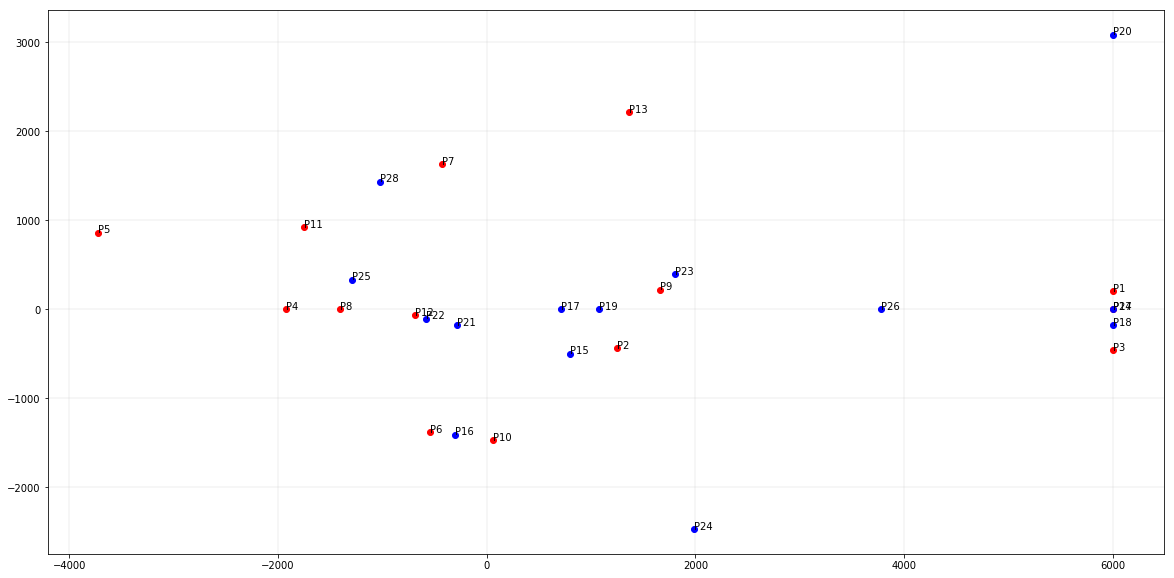

,sender,receiver,time_start,time_end,P1,P2,P3,P4,P5,P6,...,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28
10000,21.0,15.0,95300.0,96100.0,"(nan, nan)","(1250.0, -740.0)","(nan, nan)","(-1920.0, -1740.0)","(-3720.0, -470.0)","(-540.0, -2460.0)",...,"(1080.0, 1890.0)","(nan, nan)","(-280.0, -1130.0)","(-580.0, -2120.0)","(1800.0, -210.0)","(1990.0, -2120.0)","(-1290.0, 150.0)","(3780.0, -310.0)","(nan, nan)","(-1020.0, 1580.0)"


In [15]:
h = 10000
print ('sender= ',data[h:h+1]['sender'].values,'     receiver= ',data[h:h+1]['receiver'].values)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10

plt.grid(linestyle='-', linewidth=0.2)

for i in range(1,29):
    if i<15:
        if np.isfinite(get_loc(h,'P'+str(i))[0]) and np.isfinite(get_loc(h,'P'+str(i))[1]):
            plt.plot(get_loc(h,'P'+str(i))[0],get_loc(0,'P'+str(i))[1],'ro')
            text_ = 'P'+str(i)
            plt.text(get_loc(h,text_)[0],get_loc(0,text_)[1],text_)
    else:
         if np.isfinite(get_loc(h,'P'+str(i))[0]) and np.isfinite(get_loc(h,'P'+str(i))[1]):
            plt.plot(get_loc(h,'P'+str(i))[0],get_loc(0,'P'+str(i))[1],'bo')
            text_ = 'P'+str(i)
            plt.text(get_loc(h,text_)[0],get_loc(0,text_)[1],text_)
plt.legend()
plt.show()
data[h:h+1]

In [16]:
## Count the number of NaNs in every row
for index_ in data.index:
    cou = 0
    for i,element in enumerate(data.iloc[i,4:]):
        if (np.isfinite(element[0]) == False) or (np.isfinite(element[1]) ==  False):
            cou +=1
            #print (index_,i)
    if (cou != 6):
        print ('Ata')
        print (cou,index_)
        #print (data[index_:index_+1])
        

In [17]:
remove = []
# Same sender and receiver
for index_ in data.index:
    if data.sender[index_] == data.receiver[index_]:
        remove.append(index_)
        print (index_)        

655
2268
2729
9082
9795


In [18]:
# Receiver is nan
for index_ in data.index:
    if (np.isfinite(data.receiver[index_])):
        if (np.isfinite(data['P'+str(int(data.receiver[index_]))][index_][0]) == False):
            remove.append(index_)
            print (index_)

898


In [19]:
# Sender is nan
for index_ in data.index:
    if (np.isfinite(data.sender[index_])):
        if (np.isfinite(data['P'+str(int(data.sender[index_]))][index_][0]) == False):
            remove.append(index_)
            print (index_)

1161


In [20]:
remove

[655, 2268, 2729, 9082, 9795, 898, 1161]

In [21]:
def map_player(index):
    index = int(index)
    sender = data.sender[index] #id of sender player
    mapp = {}
    
    
    if sender < 15:
        for i in range(1,15):
            text = 'P'+str(i)
            player_loc = data.loc[index,text]
            if (np.isfinite(player_loc[0])) and i!=sender:
                mapp[i]=distance(index,'P'+str(sender),text)
        
        mapp=sorted(mapp.items(), key=operator.itemgetter(1))
        
        li={}
        
        for i in range(15,29):
            text = 'P'+str(i)
            player_loc = data.loc[index,text]
            if (np.isfinite(player_loc[0])) and i!=sender:
                li[i]=distance(index,'P'+str(sender),text)
                
        li=sorted(li.items(), key=operator.itemgetter(1))
        
        mapp.extend(li)
                
    elif sender > 14:
        for i in range(15,29):
            text = 'P'+str(i)
            player_loc = data.loc[index,text]
            if (np.isfinite(player_loc[0])) and i!=sender:
                mapp[i]=distance(index,'P'+str(sender),text)
        
        mapp=sorted(mapp.items(), key=operator.itemgetter(1))
        
        li={}
        
        for i in range(1,15):
            text = 'P'+str(i)
            player_loc = data.loc[index,text]
            if (np.isfinite(player_loc[0])) and i!=sender:
                li[i]=distance(index,'P'+str(sender),text)
                
        li=sorted(li.items(), key=operator.itemgetter(1))
        
        mapp.extend(li)
            
    return mapp

In [22]:
data.loc[5,'P7']

(nan, nan)

In [23]:
mapp=map_player(3432)
mapp

KeyError: 'P2.0'

In [ ]:
def make_feature(index):
    index = int(index)
    mapp = map_player(index)
    receiver = data.receiver[index]
    
    id_list=[]
    dist_list=[]    
    
    for element in mapp:
        dist_list.append(element[1])
        id_list.append(element[0])
        
    x = np.array(dist_list)
       
    y = np.zeros((1,21))
    y[0,id_list.index(receiver)] = 1

    return x,y      

In [ ]:
import time
start = time.time()
X = np.zeros((1,21))
Y = np.zeros((1,21))
for i in data.index:
    if i not in remove and i!= len(data):
        x,y = make_feature(i)
        if x.shape[0] == 21:
            X = np.append(X,(np.array([x])),axis=0)
            Y = np.append(Y,y,axis=0)
            
    if i%500 == 0:
        print ('#####  Reached ', i,'/12124')
            
end = time.time()
            
print ('Time taken to run this block= ',(end-start)/60,' min.')

In [ ]:
data.index

In [ ]:
X = np.matrix(np.delete(X, (0), axis=0))
Y = np.matrix(np.delete(Y, (0), axis=0))

In [ ]:
X.shape,Y.shape

In [ ]:
np.savetxt('unscaled_featmat.txt',X)
np.savetxt('unscaled_labels.txt',Y)